<a href="https://colab.research.google.com/github/EngenPedro/Imersao-Python-Alura/blob/main/Exercicio_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df_apple = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
df_apple = df_apple.head(120).copy()


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_apple.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
df_apple = df_apple.rename_axis('Data')
df_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800
...,...,...,...,...,...,...
2010-06-18,9.723214,9.821429,9.693571,9.788214,8.286697,784621600
2010-06-21,9.917500,9.964643,9.597500,9.648929,8.168775,776490400
2010-06-22,9.720000,9.856071,9.696429,9.780357,8.280047,717262000


Criando Grafico



In [ ]:
# Convertendo o índice em uma coluna de data
df_apple['Data'] = df_apple.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
df_apple['Data'] = df_apple['Data'].apply(mdates.date2num)
df_apple

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600,14613.0
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,14614.0
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000,14615.0
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200,14616.0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800,14617.0
...,...,...,...,...,...,...,...
2010-06-18,9.723214,9.821429,9.693571,9.788214,8.286697,784621600,14778.0
2010-06-21,9.917500,9.964643,9.597500,9.648929,8.168775,776490400,14781.0
2010-06-22,9.720000,9.856071,9.696429,9.780357,8.280047,717262000,14782.0


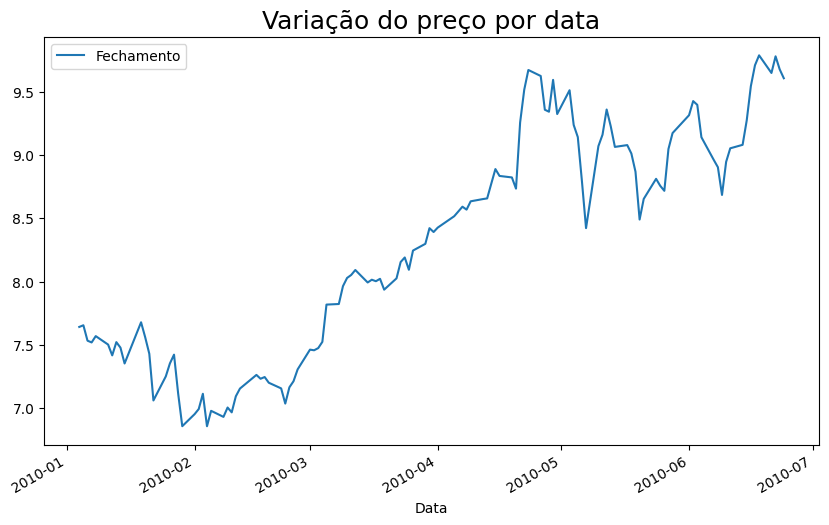

In [ ]:
df_apple['Fechamento'].plot(figsize=(10,6))

plt.title('Variação do preço por data', fontsize=18)
plt.legend(['Fechamento'])

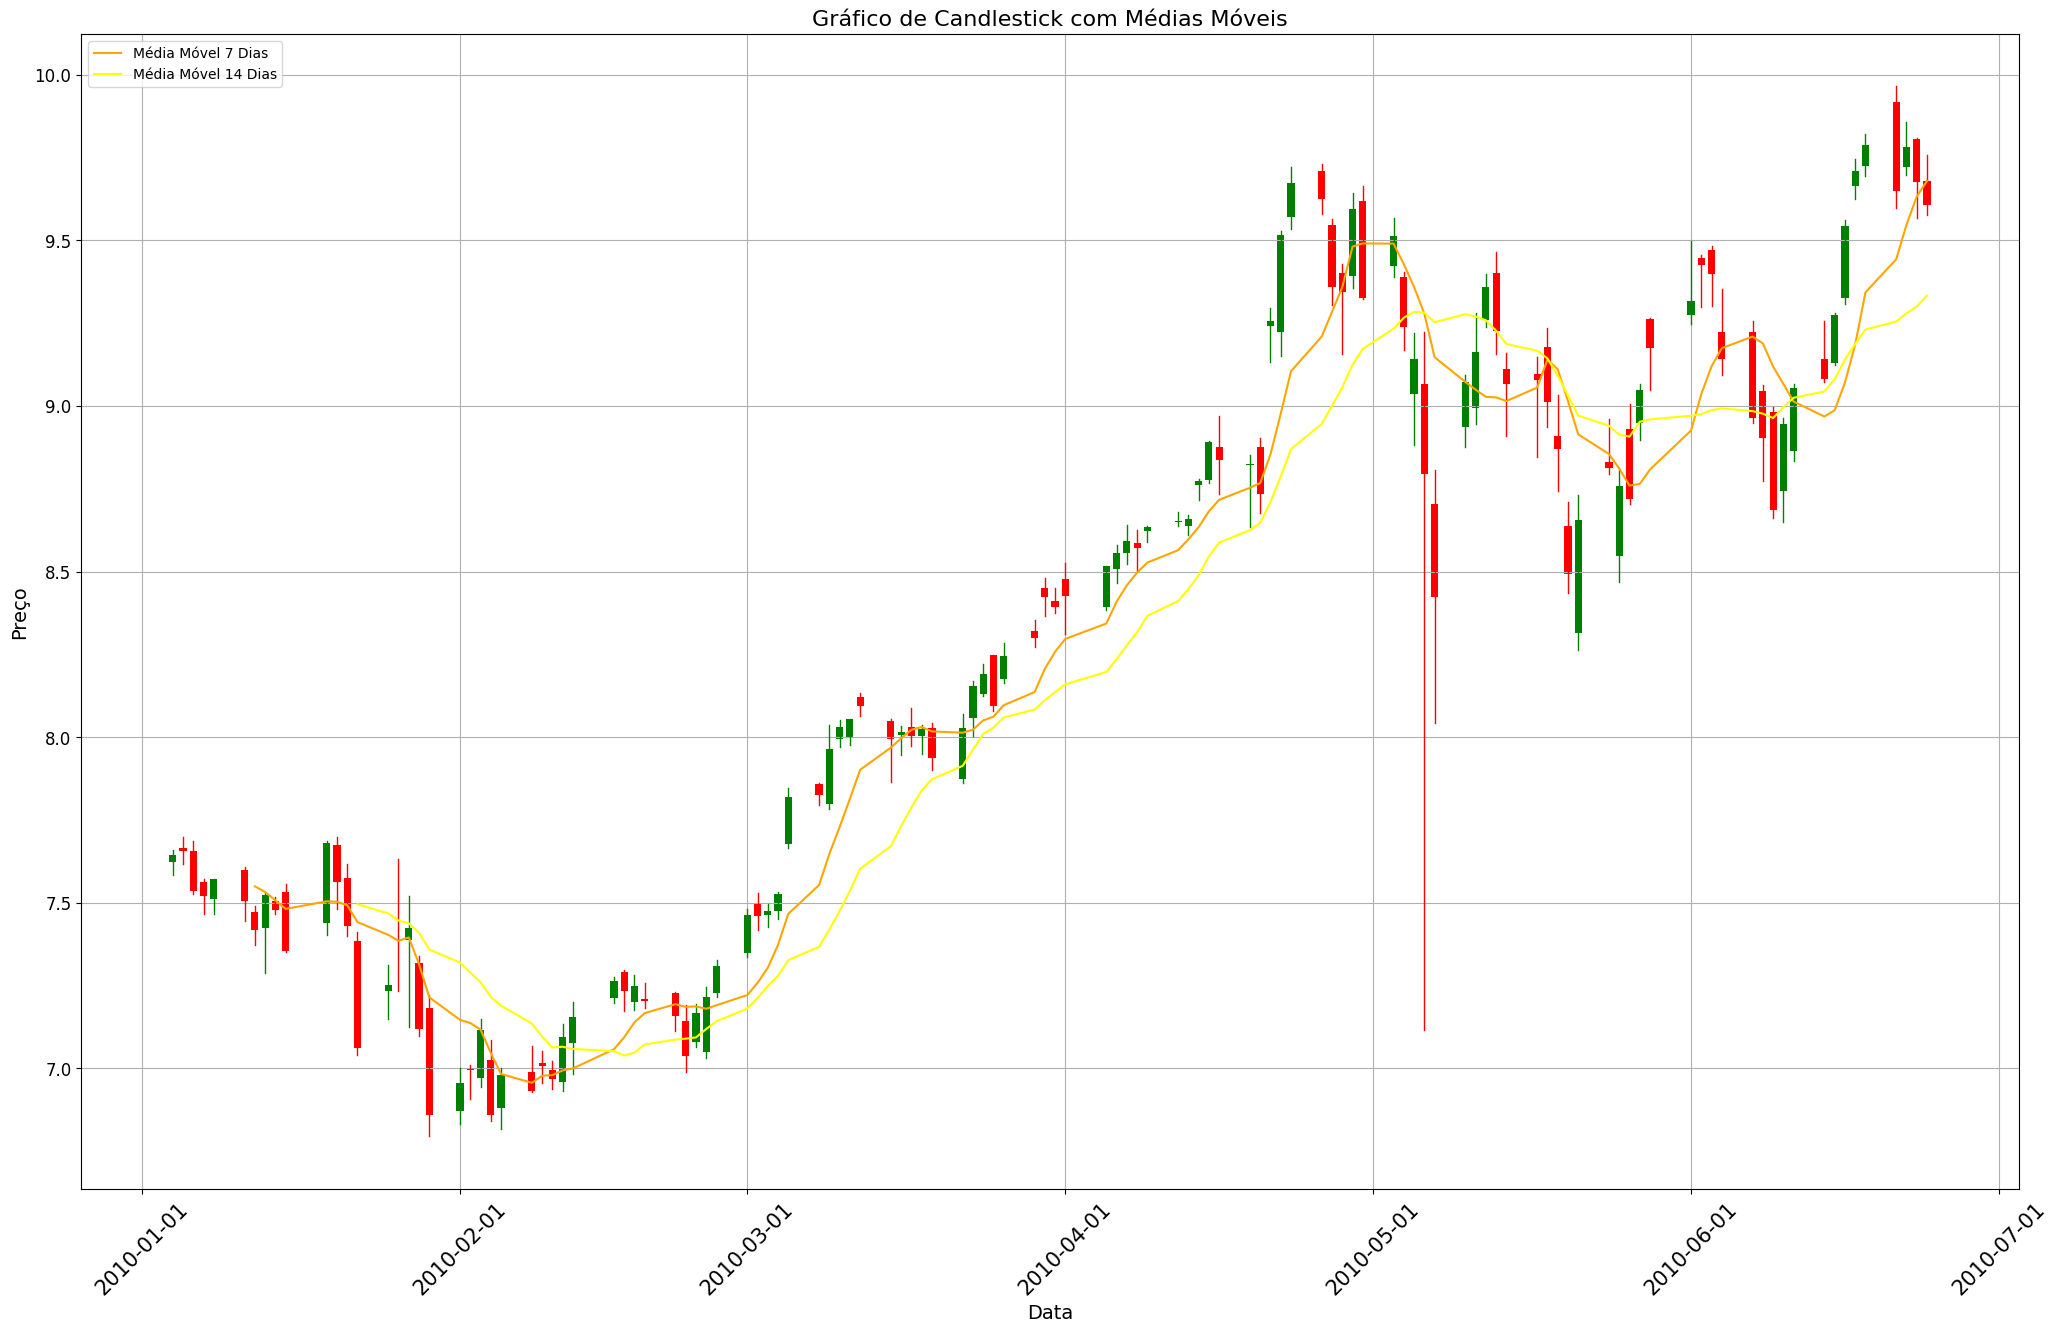

In [ ]:
fig, ax = plt.subplots(figsize=(25, 15))

# Vamos definir a largura dos candles no gráfico
width = 0.7

for i in range(len(df_apple)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df_apple['Fechamento'].iloc[i] > df_apple['Abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

        # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    # [df['Data'].iloc[i], df['Data'].iloc[i]] define o ponto x da linha (a data), e [df['Mínimo'].iloc[i], df['Máximo'].iloc[i]] define a altura da linha.
    ax.plot([df_apple['Data'].iloc[i], df_apple['Data'].iloc[i]],
            [df_apple['Minimo'].iloc[i], df_apple['Maximo'].iloc[i]],
            color=color,
            linewidth=1)

    ax.add_patch(plt.Rectangle((df_apple['Data'].iloc[i] - width/2, min(df_apple['Abertura'].iloc[i], df_apple['Fechamento'].iloc[i])),
                               width,
                               abs(df_apple['Fechamento'].iloc[i] - df_apple['Abertura'].iloc[i]),
                               facecolor=color))

df_apple['MA7'] = df_apple['Fechamento'].rolling(window=7).mean()
df_apple['MA14'] = df_apple['Fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df_apple['Data'], df_apple['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df_apple['Data'], df_apple['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Gráfico de Candlestick com Médias Móveis')
ax.set_xlabel('Data')
ax.set_ylabel('Preço')

# Adicionando grade ao plano de fundo
ax.grid(True)

# Aumentando o tamanho da fonte dos rótulos e títulos
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
ax.title.set_fontsize(16)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

plt.show()


In [ ]:
# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df_apple.index,
                             open=df_apple['Abertura'],
                             high=df_apple['Maximo'],
                             low=df_apple['Minimo'],
                             close=df_apple['Fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df_apple.index,
                         y=df_apple['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df_apple.index,
                         y=df_apple['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df_apple.index,
                     y=df_apple['Volume'],
                     name='Volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()


[*********************100%%**********************]  1 of 1 completed


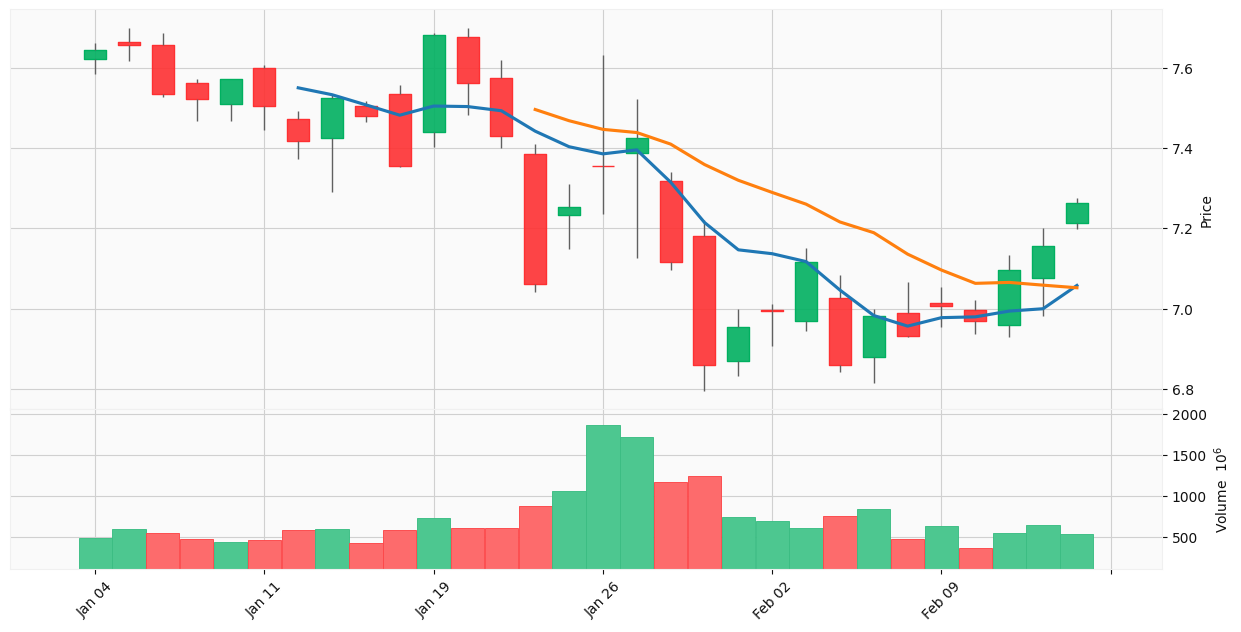

In [ ]:
df_apple = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
mpf.plot(df_apple.head(30), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

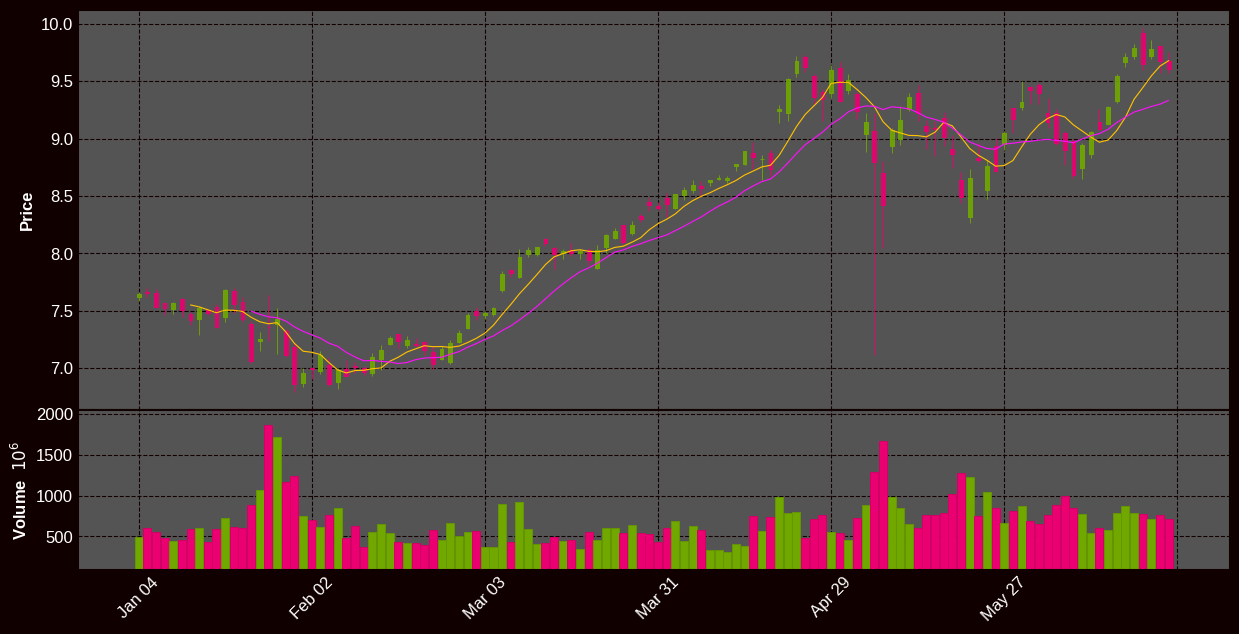

In [ ]:
my_style = mpf.make_mpf_style(base_mpf_style='binance', facecolor='555454', gridcolor='#100', edgecolor='#100', figcolor='#100', rc={"axes.labelcolor": "white", "axes.edgecolor": "white", "xtick.color": "white", "ytick.color": "white", "axes.titlecolor": "white"})
mpf.plot(df_apple.head(120), type='candle', figsize=(16, 8), volume=True, mav=(7, 14), style=my_style)

[*********************100%%**********************]  1 of 1 completed


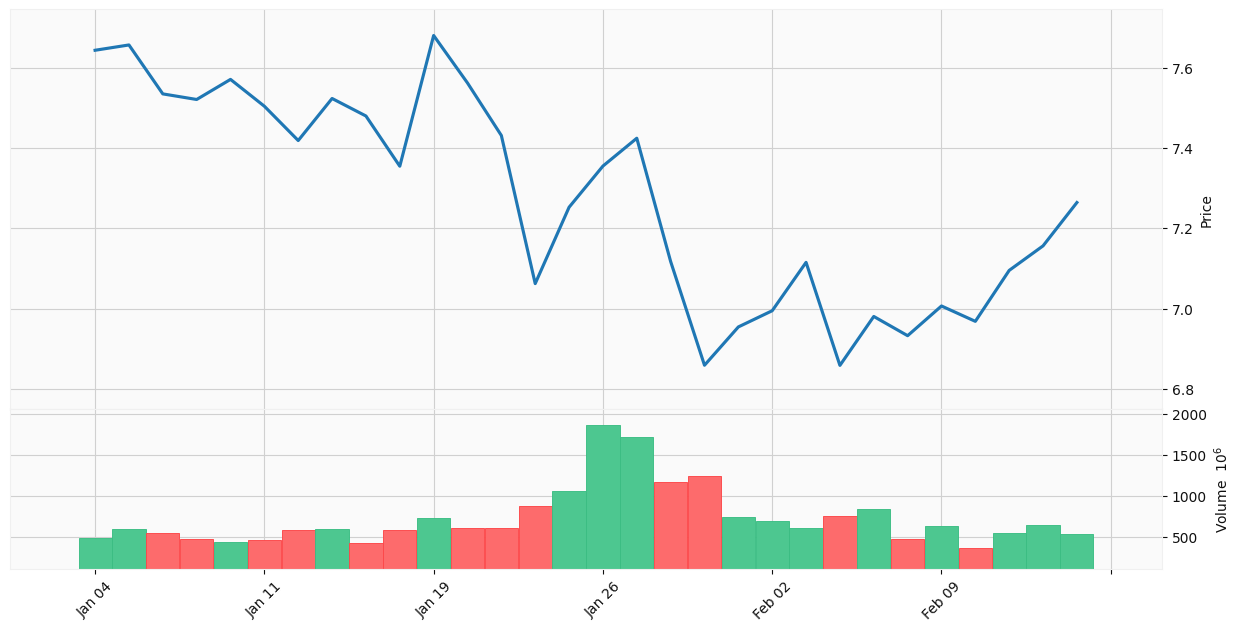

In [ ]:
# Baixando os dados da Apple
df_apple = yf.download('AAPL', start='2010-01-01', end='2021-12-31')
mpf.plot(df_apple.head(30), type='line', figsize=(16, 8), volume=True, style='yahoo')